# In this Case Study Lets Cluster the Customers Based on there Personality

## Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

## Content 

### Attributes

#### People

- ID: Customer's unique identifier
- Year_Birth: Customer's birth year
- Education: Customer's education level
- Marital_Status: Customer's marital status
- Income: Customer's yearly household income
- Kidhome: Number of children in customer's household
- Teenhome: Number of teenagers in customer's household
- Dt_Customer: Date of customer's enrollment with the company
- Recency: Number of days since customer's last purchase
- Complain: 1 if the customer complained in the last 2 years, 0 otherwise

#### Products

- MntWines: Amount spent on wine in last 2 years
- MntFruits: Amount spent on fruits in last 2 years
- MntMeatProducts: Amount spent on meat in last 2 years
- MntFishProducts: Amount spent on fish in last 2 years
- MntSweetProducts: Amount spent on sweets in last 2 years
- MntGoldProds: Amount spent on gold in last 2 years

#### Promotion

- NumDealsPurchases: Number of purchases made with a discount
- AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise
- AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
- AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
- AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise
- AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise
- Response: 1 if customer accepted the offer in the last campaign, 0 otherwise

#### Place

- NumWebPurchases: Number of purchases made through the company’s website
- NumCatalogPurchases: Number of purchases made using a catalogue
- NumStorePurchases: Number of purchases made directly in stores
- NumWebVisitsMonth: Number of visits to company’s website in the last month

## Target

Need to perform clustering to summarize customer segments.

### Import Section

In [13]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import silhouette_score
import plotly.express as px
#! pip install git+https://github.com/crew102/validclust.git
from validclust import dunn
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn.metrics import pairwise_distances
from sklearn.impute import KNNImputer
#!pip3 install umap-learn
from umap import umap_ as UMAP
from datetime import date
from datetime import datetime
from tqdm import tqdm
tqdm.pandas()

### Lets Pull the data from kaggle

In [3]:

! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets download -d imakash3011/customer-personality-analysis
! mkdir clustering_data
!unzip /content/customer-personality-analysis.zip -d clustering_data


Saving kaggle.json to kaggle.json
  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 4.59MB/s]
Archive:  /content/customer-personality-analysis.zip
  inflating: clustering_data/marketing_campaign.csv  


Lets Load the dataset

In [16]:
dataset = pd.read_csv('/content/clustering_data/marketing_campaign.csv',sep='	')
dataset.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [17]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

## Data Preperation for Clustering

 |#|Column|Non-Null|Count|Dtype|Operation|
 |------|:-------|:-------|:-------|:-------|:-------|
 0|ID|2240| non-null|int64| Drop
 1|Year_Birth|2240| non-null|int64| convert to age and standaradise
 2|Education|2240| non-null|object | ordinal encoding
 3|Marital_Status|2240| non-null|object | one hot
 4|Income|2216 | non-null|float64 | imputation and standardization
 5|Kidhome|2240| non-null|int64| standardization
 6|Teenhome|2240| non-null|int64| standardization
 7|Dt_Customer|2240| non-null|object | convert to date and standardise
 8|Recency|2240 |non-null|int64|standardise
 9|MntWines|2240| non-null|int64| standardise
 10|MntFruits|2240 |non-null|int64| standardise
 11|MntMeatProducts|2240 |non-null|int64| standardise
 12|MntFishProducts|2240 |non-null|int64| standardise
 13|MntSweetProducts|2240 |non-null|int64| standardise
 14|MntGoldProds|2240 |non-null|int64| standardise
 15|NumDealsPurchases|2240| non-null|int64| standardise
 16|NumWebPurchases|2240 |non-null|int64| standardise
 17|NumCatalogPurchases|2240 |non-null|int64| standardise
 18|NumStorePurchases|2240| non-null|int64| standardise
 19|NumWebVisitsMonth|2240| non-null|int64| standardise
 20|AcceptedCmp3|2240 |non-null|int64| leave
 21|AcceptedCmp4|2240 |non-null|int64| leave
 22|AcceptedCmp5|2240 |non-null|int64| leave
 23|AcceptedCmp1|2240 |non-null|int64| leave
 24|AcceptedCmp2|2240 |non-null|int64| leave
 25|Complain|2240| non-null|int64| leave
 26|Z_CostContact|2240 |non-null|int64| drop
 27|Z_Revenue|2240 |non-null|int64| drop
 28|Response|2240| non-null|int64| leave



## Drop unnecessary fields

In [18]:
dataset = dataset.drop(['ID','Z_CostContact','Z_Revenue'],axis = 1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

# year of birth to age

In [19]:
current_year = date.today().year
print(current_year)
dataset['Age'] = dataset.Year_Birth.progress_apply(lambda x : current_year - x )
dataset = dataset.drop(['Year_Birth'],axis = 1)

2022


100%|██████████| 2240/2240 [00:00<00:00, 271727.24it/s]


In [20]:
def datediff(dates):
  # dates in string format
  str_d1 = dates.replace('-','/')
  str_d2 = date.today().strftime("%d/%m/%Y")
  #print(str_d2)

  # convert string to date object
  d1 = datetime.strptime(str_d1, "%d/%m/%Y")
  d2 = datetime.strptime(str_d2, "%d/%m/%Y")
  #print(d1)
  # difference between dates in timedelta
  delta = d2 - d1
  #print(f'Difference is {delta.days} days')
  return delta.days
dataset['Dt_Customer_Days'] = dataset.Dt_Customer.progress_apply(datediff)
dataset = dataset.drop(['Dt_Customer'],axis = 1)

100%|██████████| 2240/2240 [00:00<00:00, 42479.92it/s]


In [21]:
dataset.head()

,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Dt_Customer_Days
0,Graduation,Single,58138.0,0,0,58,635,88,546,172,...,7,0,0,0,0,0,0,1,65,3744
1,Graduation,Single,46344.0,1,1,38,11,1,6,2,...,5,0,0,0,0,0,0,0,68,3194
2,Graduation,Together,71613.0,0,0,26,426,49,127,111,...,4,0,0,0,0,0,0,0,57,3393
3,Graduation,Together,26646.0,1,0,26,11,4,20,10,...,6,0,0,0,0,0,0,0,38,3220
4,PhD,Married,58293.0,1,0,94,173,43,118,46,...,5,0,0,0,0,0,0,0,41,3242


In [32]:
np.unique(dataset.Education)

array(['2n Cycle', 'Basic', 'Graduation', 'Master', 'PhD'], dtype=object)

In [33]:
pipeline_ordinal = Pipeline([('OrdinalEncoder',OrdinalEncoder(categories = [['Basic', 'Graduation','2n Cycle','Master', 'PhD']])),
         ('standardise',StandardScaler())])
columtransform = ColumnTransformer(
    [
       ('pipeline_ordinal',pipeline_ordinal,['Education']),
      ("onehot",OneHotEncoder(handle_unknown = "ignore"),['Marital_Status']),
    ("standardise",StandardScaler(),['Income', 'Kidhome', 'Teenhome',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'Age', 'Dt_Customer_Days'])]
    ,remainder = "passthrough"
    )
dataset = pd.DataFrame(data = columtransform.fit_transform(dataset))
dataset.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.820598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.234063,...,0.693904,0.985345,1.531185,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.820598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.234559,...,-0.130463,1.235733,-1.190545,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.820598,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.769478,...,-0.542647,0.317643,-0.205773,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.820598,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,-1.017239,...,0.281720,-1.268149,-1.061881,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.528962,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.240221,...,-0.130463,-1.017761,-0.953012,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Lets Impute Missing Values

In [34]:
imputer = KNNImputer(n_neighbors=2)
dataset = pd.DataFrame(data = imputer.fit_transform(dataset))

In [35]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       2240 non-null   float64
 1   1       2240 non-null   float64
 2   2       2240 non-null   float64
 3   3       2240 non-null   float64
 4   4       2240 non-null   float64
 5   5       2240 non-null   float64
 6   6       2240 non-null   float64
 7   7       2240 non-null   float64
 8   8       2240 non-null   float64
 9   9       2240 non-null   float64
 10  10      2240 non-null   float64
 11  11      2240 non-null   float64
 12  12      2240 non-null   float64
 13  13      2240 non-null   float64
 14  14      2240 non-null   float64
 15  15      2240 non-null   float64
 16  16      2240 non-null   float64
 17  17      2240 non-null   float64
 18  18      2240 non-null   float64
 19  19      2240 non-null   float64
 20  20      2240 non-null   float64
 21  21      2240 non-null   float64
 22  

# Lets start with K-Means Clustering

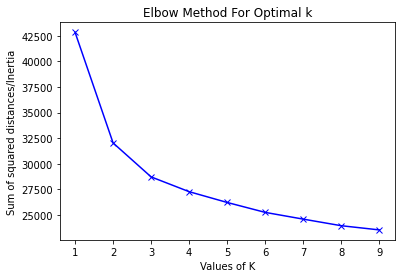

In [36]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(dataset)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

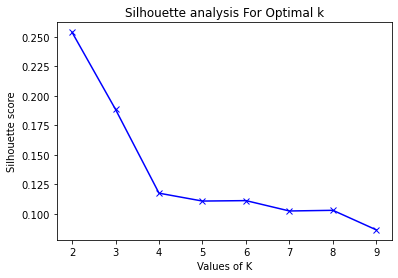

In [37]:
range_n_clusters = range(2,10)
silhouette_avg = []
for num_clusters in range_n_clusters:
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(dataset)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(dataset, cluster_labels))
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

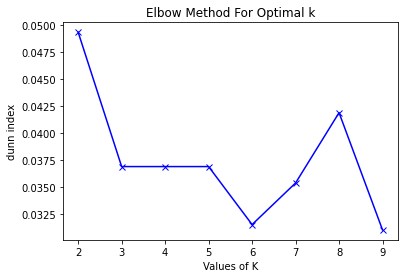

In [39]:
Dunn_Index = []
K = range(2,10)
for num_clusters in K :
  kmeans = KMeans(n_clusters=num_clusters)
  kmeans.fit(dataset)
  labels = kmeans.labels_
  dist = pairwise_distances(dataset)
  Dunn_Index.append(dunn(dist,labels))
plt.plot(K,Dunn_Index,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('dunn index') 
plt.title('Elbow Method For Optimal k')
plt.show()

# Lets take best cluster as 4

In [56]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(dataset)
kmeanslabels = kmeans.labels_

In [57]:
trans_3d = TSNE(n_components=3,perplexity = 50.0)
dataset_3d = trans_3d.fit_transform(dataset)
dataset_3d_kmeans = np.column_stack((dataset_3d,kmeanslabels))
fig = px.scatter_3d(pd.DataFrame(dataset_3d_kmeans), x=0, y=1, z=2,color=3)
fig.update_layout(autosize=False,width=800,height=800)
fig.show()

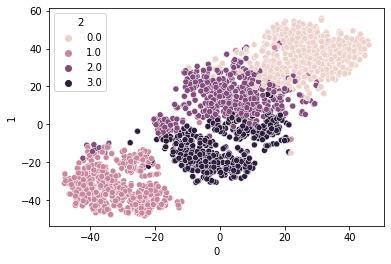

In [58]:
trans_2d = TSNE(n_components=2,perplexity = 50.0)
dataset_2d = trans_2d.fit_transform(dataset)
dataset_2d_kmeans = np.column_stack((dataset_2d,kmeanslabels))
sns.scatterplot(data=pd.DataFrame(dataset_2d_kmeans), x=0, y=1, hue=2)
plt.show()

# Now Lets Perform Agglomerative Clustering

In [59]:
AC = AgglomerativeClustering(n_clusters=4,compute_distances = True)
AC_Labels = AC.fit_predict(dataset)
dataset_3d_AC = np.column_stack((dataset_3d,AC_Labels))
fig = px.scatter_3d(pd.DataFrame(dataset_3d_AC), x=0, y=1, z=2,color=3)
fig.update_layout(autosize=False,width=800,height=800)
fig.show()

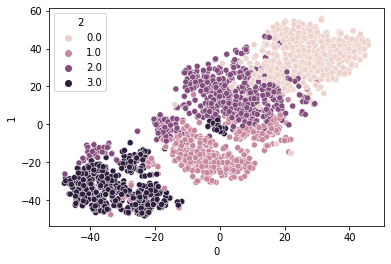

In [60]:
dataset_2d_AC = np.column_stack((dataset_2d,AC_Labels))
sns.scatterplot(data=pd.DataFrame(dataset_2d_AC), x=0, y=1, hue=2)
plt.show()

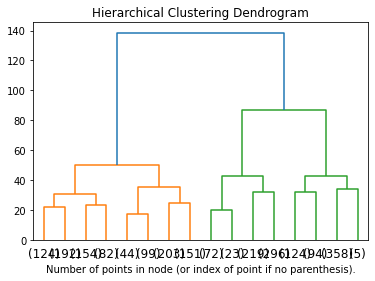

In [61]:
from scipy.cluster.hierarchy import dendrogram
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(AC, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()


# Lets Perform DBSCAN

In [76]:
dbscan = DBSCAN(eps=3, min_samples=10)
dbscan_Labels = dbscan.fit_predict(dataset)
#print('Number of clusters for dbscan is :' , np.unique(np.array(dbscan_Labels)))
print(np.unique(dbscan_Labels))
dataset_3d_dbscan = np.column_stack((dataset_3d,dbscan_Labels))
fig = px.scatter_3d(pd.DataFrame(dataset_3d_dbscan), x=0, y=1, z=2,color=3)
fig.update_layout(autosize=False,width=800,height=800)
fig.show()

[-1  0  1]


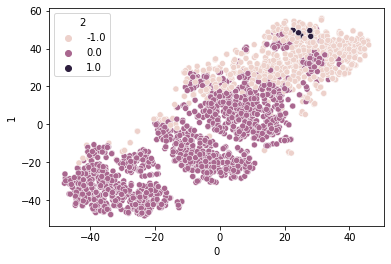

In [77]:
dataset_2d_dbscan = np.column_stack((dataset_2d,dbscan_Labels))
sns.scatterplot(data=pd.DataFrame(dataset_2d_dbscan), x=0, y=1, hue=2)
plt.show()